# <u> Unit 5 Notebook</u>: Creating Sampling Distributions - Building Blocks for Inference 

<hr>

## <u> Case Study 1</u>: UIUC Course Enrollment Sampling Distribution of Sample Means

Suppose we were to take a random sample of courses from our **population of courses** and then take the **mean enrollment of courses in that sample**. We would like to know how likely would it be for us to get an average course enrollment that is as high as the one that we observed. In order to help us answer this question we will complete the following tasks.

### Creating Sampling Distributions of Sample Means
* Create a **sampling distribution** of **sample means of course enrollments**. The samples should all be of size <u>n=10</u> and should be drawn with replacement from the artificial UIUC class population.
* Create a **sampling distribution** of **sample means of course enrollments**. The samples should all be of size <u>n=100</u> and should be drawn with replacement from the artificial UIUC class population.
* Create a **sampling distribution** of **sample means of course enrollments**. The samples should all be of size <u>n=400</u> and should be drawn with replacement from the artificial UIUC class population.

### Learning about the Properties of Sampling Distribution of Sample Means
* What happens to the mean, spread, and shape of the sampling distribution of sample means as the sizes of the samples (n) in the sampling distribution increases?

<hr>


## <u> Case Study 2</u>: Coin Flip Outcome Sampling Distribution of Sample Proportions

Suppose we were to take a random sample of coin flip outcomes (H or T) from our **population of coin flip outcomes** and then calculate the **proportion of outcomes in that sample that are a head**. We would like to know how likely would it be for us to get an sample proportion of heads that is as high as the one that we observed. In order to help us answer this question we will complete the following tasks.

### Creating Sampling Distributions of Sample Proportions

* Create a **sampling distribution** of **sample proportion of heads**. The samples should all be of size <u>n=10</u> and should be drawn with replacement from the population of coin flip possibilities (ie. head or tail).
* Create a **sampling distribution** of **sample proportion of heads**. The samples should all be of size <u>n=100</u> and should be drawn with replacement from the population of coin flip possibilities (ie. head or tail).
* Create a **sampling distribution** of **sample proportion of heads**. The samples should all be of size <u>n=400</u> and should be drawn with replacement from the population of coin flip possibilities (ie. head or tail).

### Learning about the Properties of Sampling Distribution of Sample Proportions

* What happens to the mean, spread, and shape of the sampling distribution of sample proportion as the sizes of the samples (n) in the sampling distribution increases?

<hr>

## Python Code Review: <u>More about for loops</u>


In order to do simulations we use Python's flow control to allow us to repeatedly draw samples. The **for** loop is fundamental in many programming languages. Here's a simple version. Notice that for Python the **colon (:)** and **indentation** are important. The indentation needs to be 4 characters wide! The notebook formats this automatically. 

### For loops with a list

In [1]:
for x in ["Fido", "Rex", "Mitzi", "Fluffy", "Mr. Lizard"]:
    print("Here ", x, "!", sep="")

Here Fido!
Here Rex!
Here Mitzi!
Here Fluffy!
Here Mr. Lizard!


### For loops with a range
Here's another example, with the same general principle that the for loop passes through all the values in the "in" list.

In [2]:
for i in range(5):
    print("Hello Fidotron-R", i, ", welcome!", sep="")

Hello Fidotron-R0, welcome!
Hello Fidotron-R1, welcome!
Hello Fidotron-R2, welcome!
Hello Fidotron-R3, welcome!
Hello Fidotron-R4, welcome!


The for loop allows us to do an operation repeatedly by stepping through a finite list. This is extremely useful for performing computer simulations in which we repeatedly draw samples and study the the effects of random variation on the statistics.

## <u> Case Study 1</u>: Sampling Distribution of Sample Means

### <u> Research Question</u>: What happened to the mean, standard deviation, and shape of the sampling distribution of sample means as we increased the size of the samples n?


### Population

First let's create our artificial UIUC population again. In this case study we will be considering the population of *enrollments* (ie. a population of *quantitative data*).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
# create a data frame for illustration and testing
courses = ['cs105', 'cs105', 'stat107', 'stat207', 'stat207',  
           'badm210', 'badm210', 'ansc307']
sections = ['B', 'A', 'A', 'A', 'B', 'A', 'B', 'A']
enrollments = [134, 345, 343, 103, 123, 172, 216, 55]
sectdf = pd.DataFrame({'course': courses,
                      'section': sections,
                      'enrolled': enrollments})
sectdf

,course,section,enrolled
0,cs105,B,134
1,cs105,A,345
2,stat107,A,343
3,stat207,A,103
4,stat207,B,123
5,badm210,A,172
6,badm210,B,216
7,ansc307,A,55


Then, let's summarize this population by calculating its mean.

* The population mean is *usually* unknown, because the population is usually too large to collect.
* Thus, the population mean is *usually* a population parameter we are trying to make an inference, *using* a sample drawn from this population.
* For now, we will assume we know the population mean so we can explore what happens to the sampling distribution and how it related to the population mean.

In [5]:
sectdf['enrolled'].mean()

186.375

#### So we will say that $\mu=186.375.

We can also summarize this population by calculating its standard deviation.

* The population standard deviation is *usually* unknown, because the population is usually too large to collect.
* For now, we will assume we know the population standard deviation.

In [6]:
sectdf['enrolled'].std()

108.06603470629824

#### So we will say that $\sigma=108.07$.

We've summarized a little about this population.  We might want to learn more about the distribution, including its shape.  

We can examine the distribution in more detail with a histogram.

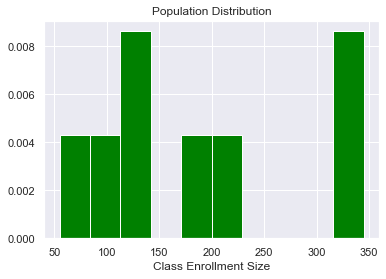

In [7]:
sectdf['enrolled'].hist(density=True, color='green')
plt.title('Population Distribution')
plt.xlabel('Class Enrollment Size')
plt.show()

### Sample

What happens if instead I start taking samples of the data?

I'll start by taking a random sample of size 2.

Then, because I know one sample only provides a small picture of the data, I'll take repeated random samples of the same size.  For each random sample, I'll generate the mean to summarize the distribution.  Then, I'll observe what the set of sample means looks like.

#### Samples of Size 2

To start, I'll consider taking repeated random samples of size 2.

In [8]:
rand_sample=sectdf['enrolled'].sample(2, replace=True)
rand_sample

2    343
1    345
Name: enrolled, dtype: int64

In [9]:
x = 'enrolled'
SampleMeans = []
for i in range(10000):
    
    rand_sample=sectdf[x].sample(2, replace=True)
    rand_sample_mean=rand_sample.mean()
    SampleMeans.append(rand_sample_mean)
    
print('Sampling Distribution of Sample Means (samples of size n=2)')
print(pd.DataFrame({x: SampleMeans}))

Sampling Distribution of Sample Means (samples of size n=2)
      enrolled
0         89.0
1        280.5
2        153.0
3         94.5
4        128.5
...        ...
9995     279.5
9996     344.0
9997     233.0
9998     199.0
9999     169.5

[10000 rows x 1 columns]


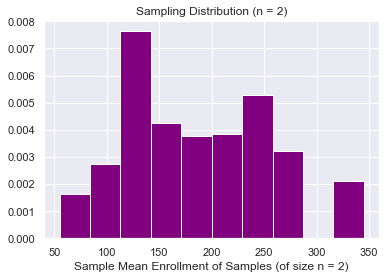

In [10]:
sampdist = pd.DataFrame({x: SampleMeans})
sampdist['enrolled'].hist(density=True, color='purple')
plt.title('Sampling Distribution (n = 2)')
plt.xlabel('Sample Mean Enrollment of Samples (of size n = 2)')
plt.show()

In [11]:
sampdist.sort_values(by = 'enrolled', inplace = True)
distcount = sampdist.value_counts()
distcount

sampdist.groupby('enrolled').size()

enrolled
55.0     168
79.0     309
89.0     336
94.5     309
103.0    147
113.0    320
113.5    289
118.5    299
123.0    157
128.5    307
134.0    175
135.5    306
137.5    362
147.5    296
153.0    306
159.5    314
169.5    313
172.0    170
175.0    310
194.0    313
199.0    299
200.0    295
216.0    169
223.0    333
224.0    319
233.0    279
234.0    292
238.5    320
239.5    316
257.5    325
258.5    310
279.5    322
280.5    302
343.0    175
344.0    296
345.0    142
dtype: int64

In [12]:
print(sampdist.mean())
print(sampdist.std())


enrolled    185.8993
dtype: float64
enrolled    71.437789
dtype: float64


#### Repeated Random Samples of Size n = 10

Now, create a sampling distribution of sample means with samples of size n=10. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?

Let's generate 5 random samples from the data frame and calculate the corresponding sample means. This is a very simple example of a Monte Carlo simulation.

We use a for loop where we initialize an empty array, SampleMeans, and then iterate a sepcified number of times. To understand how each step works you might find it helpful to break out the individual steps and run them with different values of the iteration variable i. 

<u> Step-by-step</u>:  Let's create a sampling distribution with M=5 sample means

In [13]:
# iterate 5 times
x = 'enrolled'
SampleMeans = []
for i in range(5):
    print('Trial Number:',i)
    #1. Collect a random sample of size n=10 with replacement from the population of enrollments
    rand_sample=sectdf[x].sample(10, replace=True)
    print('Random Sample')
    print(rand_sample)
    
    #2. Take the mean of this random sample
    rand_sample_mean=rand_sample.mean()
    print('Random Sample Mean')
    print(rand_sample_mean)
    
    #3. Append this random sample mean to the SampleMeans list (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
    SampleMeans.append(rand_sample_mean)
    print('Current Sampling Distribution List')
    print(SampleMeans)
    print('---------')
    
#4. print out in a dataframe
print('Sampling Distribution of Sample Means (samples of size n=10)')
print(pd.DataFrame({x: SampleMeans}))

Trial Number: 0
Random Sample
4    123
7     55
6    216
0    134
4    123
3    103
6    216
1    345
7     55
1    345
Name: enrolled, dtype: int64
Random Sample Mean
171.5
Current Sampling Distribution List
[171.5]
---------
Trial Number: 1
Random Sample
3    103
3    103
5    172
4    123
6    216
0    134
6    216
3    103
7     55
0    134
Name: enrolled, dtype: int64
Random Sample Mean
135.9
Current Sampling Distribution List
[171.5, 135.9]
---------
Trial Number: 2
Random Sample
1    345
0    134
3    103
6    216
5    172
4    123
3    103
5    172
7     55
0    134
Name: enrolled, dtype: int64
Random Sample Mean
155.7
Current Sampling Distribution List
[171.5, 135.9, 155.7]
---------
Trial Number: 3
Random Sample
2    343
3    103
7     55
5    172
6    216
1    345
6    216
3    103
7     55
1    345
Name: enrolled, dtype: int64
Random Sample Mean
195.3
Current Sampling Distribution List
[171.5, 135.9, 155.7, 195.3]
---------
Trial Number: 4
Random Sample
7     55
5    172
0 

<u>More Consise Code</u>: Let's rerun this same code, but write it in a more consise way.

**Note:** Remember, this will not give us the same sampling distribution as the code above, because we did not set a random_state and the **.sample()** function returns random results.

In [14]:
# iterate 5 times
x = 'enrolled'
SampleMeans = []
for i in range(5):
    #1. Collect a random sample of size n=10 with replacement
    #2. Take the mean of this random sample
    #3. Append this random sample mean to the SampleMeans list (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
    SampleMeans.append(sectdf[x].sample(10, replace=True).mean())    
    
#4. print out in a dataframe
print('Sampling Distribution of Sample Means (samples of size n=10)')
print(pd.DataFrame({x: SampleMeans}))

Sampling Distribution of Sample Means (samples of size n=10)
   enrolled
0     220.0
1      93.8
2     183.7
3     141.6
4     145.2


<u>Sampling Distribution with M=1000 Sample Means</u>: 
Using M=5 trials (ie. M=5 sample means) to create a sampling distribution is usually not enough to gain a good representation of a sampling distribution's behavior. Let's run the code below using M=1000 trials (ie. M=1000 sample means).

In [15]:
# iterate 1000 times
# parametrize the sample size. number of random samples, 
# and the variable name
x = 'enrolled'
n=10
M=1000
SampleMeans = []
for i in range(M):
    #1. Collect a random sample of size n=10 with replacement
    #2. Take the mean of this random sample
    #3. Append this random sample mean to the SampleMeans list (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
    SampleMeans.append(sectdf[x].sample(n, replace=True).mean())

#4. print out in a dataframe
print('Sampling Distribution of Sample Means (samples of size n=10)')    
MonteCarlo = pd.DataFrame({x: SampleMeans})
MonteCarlo

Sampling Distribution of Sample Means (samples of size n=10)


,enrolled
0,134.1
1,229.5
2,159.5
3,179.6
4,212.2
...,...
995,147.9
996,185.8
997,211.9
998,150.4


In [16]:
MonteCarlo.shape

(1000, 1)

<u>Making our own functions to Create a Sampling Distribution of Sample Means</u>

If we want to try lots of different values for n and M it gets tedious to keep copying the code and changing the parameters in multiple locations. Instead, we can make our own function to do this kind of task with varying inputs. This saves a lot of redundant effort. It also makes it easier to understand and debug the code. 

Here's a function to do the Monte carlo simulation of the sample mean for different sample sizes and numbers of Monte Carlo samples. Notice that we input the data frame (or data series), variable name x as a text string, sample size n, and number of Monte Carlo samples M. Here again, the **colon (:)** and **indentation (4 characters)** are important to indicate that the ensuing lines of code are included in the function.

In [17]:
def MCmeans(df, x='', replace=True, n=1, M=1):
    #INPUT:
    # df is a data frame
    # x is a text-valued name for a variable in the data frame
    # replace = True or False depending on whether 
    #    draws are with or without replacement
    # n = number of draws per sample
    # M = number of samples to draw
    MCstats = []
    for i in range(M):
        #1. Collect a random sample of size n=10 with replacement
        #2. Take the mean of this random sample
        #3. Append this random sample mean to the SampleMeans list 
        # (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
        MCstats.append(df[x].sample(n, replace=replace).mean())
    #4. returns the sampling distribution in a dataframe format
    return pd.DataFrame({x: MCstats})

In [18]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=10, M=10000)

MonteCarlo

,enrolled
0,181.6
1,219.4
2,211.4
3,154.7
4,189.0
...,...
9995,214.7
9996,153.4
9997,203.2
9998,114.7


<u>What is the mean, standard deviation, and shape of this sampling distribution of sample means when the size of the samples is n=10? </u>

**Mean of the Sampling Distribution Means**

In [19]:
MonteCarlo['enrolled'].mean()

186.03164999999976

**Standard Deviation of the Sampling Distribution Means**

In [20]:
MonteCarlo['enrolled'].std()

31.831252695147185

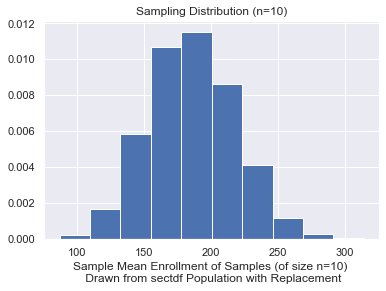

In [21]:
MonteCarlo['enrolled'].hist(density=True)
plt.title('Sampling Distribution (n=10)')
plt.xlabel('Sample Mean Enrollment of Samples (of size n=10) \n Drawn from sectdf Population with Replacement')
plt.show()

#### Sampling Distribution when n = 100

Now, let's consider increasing the sample size to n = 100.  Repeat the analysis above for this larger sample size, specifying the mean, standard deviation, and shape of the sample means in this sampling distribution.

In [22]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=100, M=10000)
MonteCarlo

,enrolled
0,173.68
1,182.79
2,192.31
3,192.67
4,216.41
...,...
9995,188.96
9996,204.68
9997,196.84
9998,175.38


In [23]:
print('Sampling Distribution Mean (Samples of Size n=100):',MonteCarlo['enrolled'].mean())
print('Sampling Distribution Standard Deviation (Samples of size n=100):',MonteCarlo['enrolled'].std())

Sampling Distribution Mean (Samples of Size n=100): 186.4598419999992
Sampling Distribution Standard Deviation (Samples of size n=100): 10.243516070040789


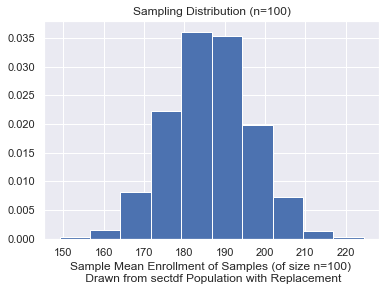

In [24]:
MonteCarlo['enrolled'].hist(density=True)
plt.title('Sampling Distribution (n=100)')
plt.xlabel('Sample Mean Enrollment of Samples (of size n=100) \n Drawn from sectdf Population with Replacement')
plt.show()

#### Sampling Distribution when n = 400

Again, we'll repeat this same analysis, now with n = 400.  Create the sampling distribution, and calculate the mean, standard deviation, and shape of the sample means in this sampling distribution.

In [25]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=400, M=10000)
MonteCarlo

,enrolled
0,184.7850
1,181.9850
2,194.5775
3,191.1325
4,192.9700
...,...
9995,186.2425
9996,189.0450
9997,180.2525
9998,184.2225


In [26]:
print('Sampling Distribution Mean (Samples of Size n=400):',MonteCarlo['enrolled'].mean())
print('Sampling Distribution Standard Deviation (Samples of size n=400):',MonteCarlo['enrolled'].std())

Sampling Distribution Mean (Samples of Size n=400): 186.31838750000045
Sampling Distribution Standard Deviation (Samples of size n=400): 5.0195315999943615


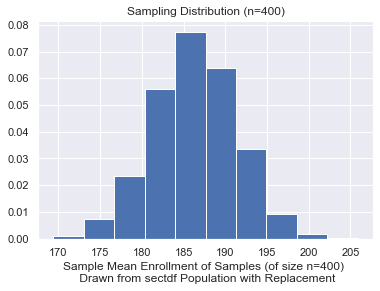

In [27]:
MonteCarlo['enrolled'].hist(density=True)
plt.title('Sampling Distribution (n=400)')
plt.xlabel('Sample Mean Enrollment of Samples (of size n=400) \n Drawn from sectdf Population with Replacement')
plt.show()

## <u>Case Study 2</u>: Sampling Distribution of Sample Proportions

If we make one draw, i.e., toss the coin once, then the uniform probability principle tells us the probability of a 1 is $p$ = 1/2. What if we draw (flip) 10 times randomly and without replacement? What proportion $\hat{p}$ of "heads" do we expect? How much is it likely to vary from this expectation? What if we toss 100 times, or 400?

Let's consider a series of sample sizes and study how the sampling distribution is affected. We'll compute mean and standard deviation of the Monte Carlo values, and look at the histrogram as well to get a picture fo the sample distributions for different sample sizes.


### <u> Research Question</u>: 

What happens to the mean, standard deviation, and shape of the sampling distribution of sample proportions as we increased the size of the samples n?

### Population Information


With our function available we can simulate all kinds of things. Here is a "data frame" of the possible outcomes when flipping a coin.

In [28]:
df = pd.DataFrame({'toss':['heads','tails'], 'value': [1, 0]})
df

,toss,value
0,heads,1
1,tails,0


**Population Proportion of Heads**

In [29]:
df['toss'].value_counts(normalize=True)

heads    0.5
tails    0.5
Name: toss, dtype: float64

#### The population proportion of heads is $p=0.5$.

### Sampling Distribution when n = 10

Create a sampling distribution of sample proportions with samples of size n=10. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?

<u>Step-by-step</u> Let's create a sampling distribution with M=5 sample proportions.



In [30]:
# iterate 5 times
x = 'value'
SampleProportions = []
for i in range(5):
    print('Trial Number:',i)
    #1. Collect a random sample of size n=10 with replacement from the population of enrollments
    rand_sample=df[x].sample(10, replace=True)
    print('Random Sample')
    print(rand_sample)
    
    #2. Find the sample proportion of heads
    # proportion of observations that are equal to 1 (ie. heads) = mean of values in this sample
    rand_sample_proportion=rand_sample.mean()
    print('Random Sample Proportion')
    print(rand_sample_proportion)
    
    #3. Append this random sample proportions to the SampleProportions list (which is our SAMPLING DISTRIBUTION OF SAMPLE PROPORTIONS!)
    SampleProportions.append(rand_sample_proportion)
    print('Current Sampling Distribution List')
    print(SampleProportions)
    print('---------')
    
#4. print out in a dataframe
print('Sampling Distribution of Sample Proportions (samples of size n=10)')
print(pd.DataFrame({x: SampleProportions}))

Trial Number: 0
Random Sample
1    0
0    1
0    1
1    0
1    0
1    0
0    1
1    0
0    1
1    0
Name: value, dtype: int64
Random Sample Proportion
0.4
Current Sampling Distribution List
[0.4]
---------
Trial Number: 1
Random Sample
0    1
0    1
1    0
1    0
1    0
1    0
1    0
1    0
0    1
0    1
Name: value, dtype: int64
Random Sample Proportion
0.4
Current Sampling Distribution List
[0.4, 0.4]
---------
Trial Number: 2
Random Sample
1    0
0    1
1    0
1    0
1    0
1    0
1    0
0    1
1    0
1    0
Name: value, dtype: int64
Random Sample Proportion
0.2
Current Sampling Distribution List
[0.4, 0.4, 0.2]
---------
Trial Number: 3
Random Sample
1    0
1    0
0    1
1    0
1    0
0    1
1    0
0    1
1    0
0    1
Name: value, dtype: int64
Random Sample Proportion
0.4
Current Sampling Distribution List
[0.4, 0.4, 0.2, 0.4]
---------
Trial Number: 4
Random Sample
1    0
1    0
0    1
0    1
1    0
0    1
0    1
0    1
1    0
1    0
Name: value, dtype: int64
Random Sample Propor

<u> Using the Function</u>:

Because the **sample proportion of "1"'s** in a column of 0/1 values = **sample mean** of the column of 0/1 values, we can create a our sampling distribution of sample proportions the same way (and with the same function) that we used to quickly create a sampling distribution of sample means.

In [31]:
MonteCarlo = MCmeans(df=df, x="value", n=10, M=10000)
MonteCarlo

,value
0,0.5
1,0.4
2,0.3
3,0.6
4,0.7
...,...
9995,0.3
9996,0.4
9997,0.4
9998,0.4


What is the mean, standard deviation, and shape of the sampling distribution of sample proportions?

In [32]:
print('Sample size = ', 10)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  10
Mean value for sample proportion = 0.49804
Standard Deviation for sample proportion = 0.1582


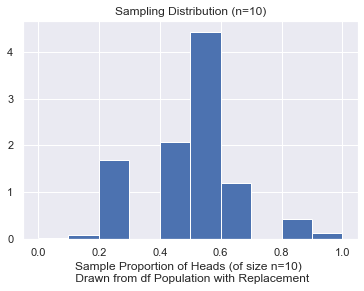

In [33]:
MonteCarlo['value'].hist(density=True)
plt.title('Sampling Distribution (n=10)')
plt.xlabel('Sample Proportion of Heads (of size n=10) \n Drawn from df Population with Replacement')
plt.show()

### Sampling Distribution when n = 100

Create a sampling distribution of sample proportions with samples of size n=100. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?

In [34]:
MonteCarlo = MCmeans(df=df, x="value", n=100, M=10000)
MonteCarlo

,value
0,0.52
1,0.45
2,0.57
3,0.45
4,0.51
...,...
9995,0.43
9996,0.53
9997,0.52
9998,0.51


In [35]:
print('Sample size = ', 100)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  100
Mean value for sample proportion = 0.49978
Standard Deviation for sample proportion = 0.04998


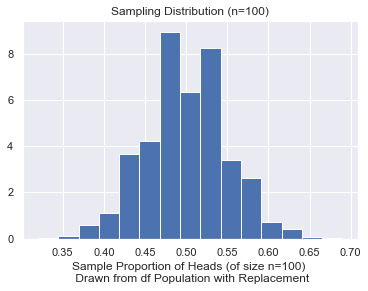

In [36]:
MonteCarlo['value'].hist(density=True, bins=15)
plt.title('Sampling Distribution (n=100)')
plt.xlabel('Sample Proportion of Heads (of size n=100) \n Drawn from df Population with Replacement')
plt.show()

### Sampling Distribution when n=400

Create a sampling distribution of sample proportions with samples of size n=400. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?

In [37]:
MonteCarlo = MCmeans(df=df, x="value", n=400, M=10000)
MonteCarlo

,value
0,0.5400
1,0.5050
2,0.5100
3,0.4650
4,0.5225
...,...
9995,0.4725
9996,0.5175
9997,0.5025
9998,0.5175


In [38]:
print('Sample size = ', 400)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  400
Mean value for sample proportion = 0.50008
Standard Deviation for sample proportion = 0.02477


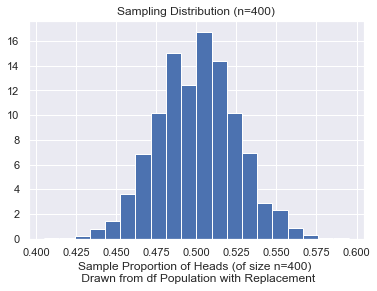

In [39]:
MonteCarlo['value'].hist(density=True, bins=20)
plt.title('Sampling Distribution (n=400)')
plt.xlabel('Sample Proportion of Heads (of size n=400) \n Drawn from df Population with Replacement')
plt.show()

In [40]:
MonteCarlo = MCmeans(df=df, x="value", n=2, M=10000)
MonteCarlo

,value
0,1.0
1,0.5
2,0.5
3,1.0
4,0.5
...,...
9995,1.0
9996,0.5
9997,0.5
9998,0.5


### Putting it all together as n increases

In [41]:
print('Sample size = ', 2)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  2
Mean value for sample proportion = 0.50095
Standard Deviation for sample proportion = 0.35205


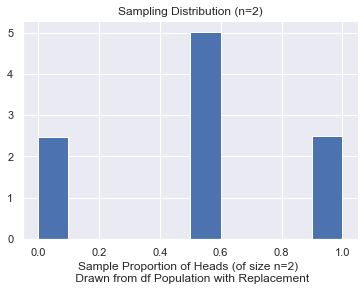

In [42]:
MonteCarlo['value'].hist(density=True)
plt.title('Sampling Distribution (n=2)')
plt.xlabel('Sample Proportion of Heads (of size n=2) \n Drawn from df Population with Replacement')
plt.show()

In [43]:
samp_size = ['Population', 'n=2', 'n=10', 'n=100', 'n=400']
mean_of_dist = [177.875, 177.002, 178.110, 177.859, 177.837]
std_of_dist = [97.11, 64.14, 28.70, 9.04, 4.57]
SampDist = pd.DataFrame({'Sample': samp_size, 
                       'Mean': mean_of_dist,
                     'Standard Deviation': std_of_dist})
SampDist

,Sample,Mean,Standard Deviation
0,Population,177.875,97.11
1,n=2,177.002,64.14
2,n=10,178.110,28.70
3,n=100,177.859,9.04
4,n=400,177.837,4.57


In [44]:
# Flipping Heads or Tails
samp_size = ['Population', 'n=2', 'n=10', 'n=100', 'n=400']
mean_of_dist = [0.5, 0.50505, 0.49942, 0.49947, 0.49989]
std_of_dist = [None, 0.35286, 0.15771, 0.04968, 0.02495]
SampDist = pd.DataFrame({'Sample': samp_size, 
                       'Mean': mean_of_dist,
                     'Standard Deviation': std_of_dist})
SampDist

,Sample,Mean,Standard Deviation
0,Population,0.50000,NaN
1,n=2,0.50505,0.35286
2,n=10,0.49942,0.15771
3,n=100,0.49947,0.04968
4,n=400,0.49989,0.02495


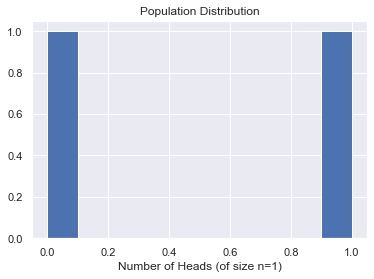

In [45]:
df['value'].hist()
plt.title('Population Distribution')
plt.xlabel('Number of Heads (of size n=1)')
plt.show()

In [46]:
def MCmeans_stats(df, x='', replace=True, n=1, M=1):
    #INPUT:
    # df is a data frame
    # x is a text-valued name for a variable in the data frame
    # replace = True or False depending on whether 
    #    draws are with or without replacement
    # n = number of draws per sample
    # M = number of samples to draw
    MCstats = []
    for i in range(M):
        #1. Collect a random sample of size n=10 with replacement
        #2. Take the mean of this random sample
        #3. Append this random sample mean to the SampleMeans list (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
        mysample = df[x].sample(n, replace=replace)
        logical = (mysample=='stat107') | (mysample=='stat207')
        MCstats.append(logical.mean())
    #4. returns the sampling distribution in a dataframe format
    return pd.DataFrame({x: MCstats})

In [47]:
stats_n2 = MCmeans_stats(sectdf, 'course', n = 2, M = 10000)

In [48]:
print('Sample size = ', 2)
print('Mean value for sample proportion =', 
      np.round(stats_n2.mean().course, 5))
print('Standard Deviation for sample proportion =', 
      np.round(stats_n2.std().course, 5))

Sample size =  2
Mean value for sample proportion = 0.37425
Standard Deviation for sample proportion = 0.3415


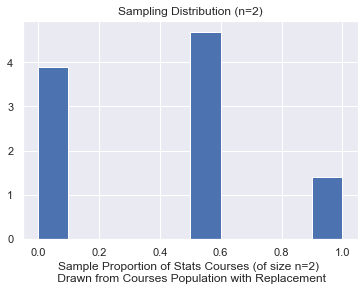

In [49]:
stats_n2['course'].hist(density = True)
plt.title('Sampling Distribution (n=2)')
plt.xlabel('Sample Proportion of Stats Courses (of size n=2) \n Drawn from Courses Population with Replacement')
plt.show()

In [50]:
stats_n10 = MCmeans_stats(sectdf, 'course', n = 10, M = 10000)
print('Sample size = ', 10)
print('Mean value for sample proportion =', 
      np.round(stats_n10.mean().course, 5))
print('Standard Deviation for sample proportion =', 
      np.round(stats_n10.std().course, 5))

Sample size =  10
Mean value for sample proportion = 0.37702
Standard Deviation for sample proportion = 0.15031


In [51]:
stats_n100 = MCmeans_stats(sectdf, 'course', n = 100, M = 10000)
print('Sample size = ', 100)
print('Mean value for sample proportion =', 
      np.round(stats_n100.mean().course, 5))
print('Standard Deviation for sample proportion =', 
      np.round(stats_n100.std().course, 5))

Sample size =  100
Mean value for sample proportion = 0.3752
Standard Deviation for sample proportion = 0.04843


In [52]:
stats_n400 = MCmeans_stats(sectdf, 'course', n = 400, M = 10000)
print('Sample size = ', 400)
print('Mean value for sample proportion =', 
      np.round(stats_n400.mean().course, 5))
print('Standard Deviation for sample proportion =', 
      np.round(stats_n400.std().course, 5))

Sample size =  400
Mean value for sample proportion = 0.37502
Standard Deviation for sample proportion = 0.02428


In [53]:
# Pick Stats Course
samp_size = ['Population', 'n=2', 'n=10', 'n=100', 'n=400']
mean_of_dist = [0.25, 0.2453, 0.25274, 0.25038, 0.24988]
std_of_dist = [None, 0.3042, 0.13654, 0.04355, 0.02163]
SampDist = pd.DataFrame({'Sample': samp_size, 
                       'Mean': mean_of_dist,
                     'Standard Deviation': std_of_dist})
SampDist

,Sample,Mean,Standard Deviation
0,Population,0.25000,NaN
1,n=2,0.24530,0.30420
2,n=10,0.25274,0.13654
3,n=100,0.25038,0.04355
4,n=400,0.24988,0.02163


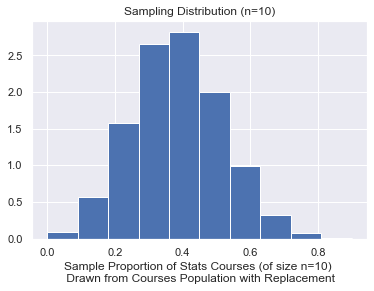

In [54]:
stats_n10['course'].hist(density = True)
plt.title('Sampling Distribution (n=10)')
plt.xlabel('Sample Proportion of Stats Courses (of size n=10) \n Drawn from Courses Population with Replacement')
plt.show()

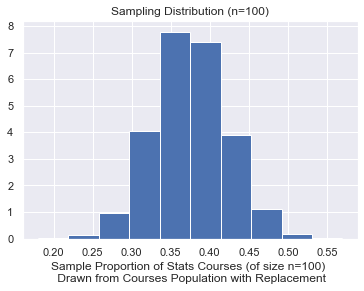

In [55]:
stats_n100['course'].hist(density = True)
plt.title('Sampling Distribution (n=100)')
plt.xlabel('Sample Proportion of Stats Courses (of size n=100) \n Drawn from Courses Population with Replacement')
plt.show()

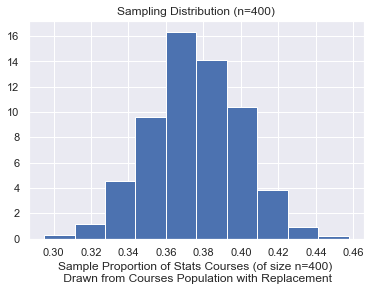

In [56]:
stats_n400['course'].hist(density = True)
plt.title('Sampling Distribution (n=400)')
plt.xlabel('Sample Proportion of Stats Courses (of size n=400) \n Drawn from Courses Population with Replacement')
plt.show()

<hr>
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign